In [ ]:
!pip install wandb

In [35]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras import layers
import wandb
from wandb.keras import WandbCallback

In [ ]:
wandb.init(project='cfar10')

In [37]:


config=wandb.config
config.learning_rate=0.001



In [38]:
dataset=tf.keras.datasets.cifar10
(X_train,Y_train),(X_test,Y_test)=dataset.load_data()
(X_train_deep,Y_train_deep),(X_test_deep,Y_test_deep)=dataset.load_data()

[6]


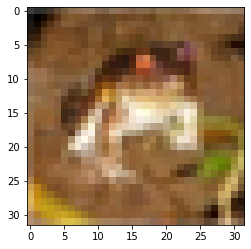

In [39]:
plt.imshow(X_train[0])
print(Y_train[0])

In [40]:
print(X_train.shape)
print(Y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [41]:

X_train=X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2]*X_train.shape[3])

In [42]:
X_train.shape

(50000, 3072)

In [43]:
X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,test_size=0.2,random_state=42)

In [44]:
#mlp
model=tf.keras.models.Sequential([
    Dense(64,input_dim=X_train.shape[1],activation='relu'),#input_layer
    Dense(32,activation='relu'),
    Dense(10,activation='softmax')#output_layer

])

In [45]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=config.learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [46]:
output=model.fit(X_train,Y_train,validation_data=(X_val,Y_val),epochs=5,callbacks=[WandbCallback()])

Epoch 1/5
1250/1250 [==============================] - 7s 5ms/step - loss: 5.3325 - accuracy: 0.1017 - val_loss: 2.3038 - val_accuracy: 0.0978 - _timestamp: 1646567393.0000 - _runtime: 17.0000
Epoch 2/5
1250/1250 [==============================] - 8s 6ms/step - loss: 2.3036 - accuracy: 0.0986 - val_loss: 2.3029 - val_accuracy: 0.0973 - _timestamp: 1646567401.0000 - _runtime: 25.0000
Epoch 3/5
1250/1250 [==============================] - 7s 6ms/step - loss: 2.3034 - accuracy: 0.0977 - val_loss: 2.3045 - val_accuracy: 0.0972 - _timestamp: 1646567408.0000 - _runtime: 32.0000
Epoch 4/5
1250/1250 [==============================] - 5s 4ms/step - loss: 2.3028 - accuracy: 0.1000 - val_loss: 2.3028 - val_accuracy: 0.0933 - _timestamp: 1646567413.0000 - _runtime: 37.0000
Epoch 5/5
1250/1250 [==============================] - 5s 4ms/step - loss: 3.4322 - accuracy: 0.1002 - val_loss: 2.3028 - val_accuracy: 0.0994 - _timestamp: 1646567418.0000 - _runtime: 42.0000


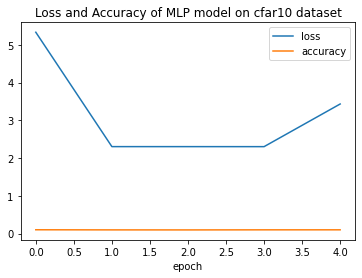

In [47]:
plt.plot(output.history['loss'])
plt.plot(output.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.title('Loss and Accuracy of MLP model on cfar10 dataset')
plt.show()

In [48]:
print(X_test.shape)
print(Y_test.shape)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2]*X_test.shape[3])
print(X_test.shape)

(10000, 32, 32, 3)
(10000, 1)
(10000, 3072)


In [49]:

accuracy = model.evaluate(X_test,Y_test)


313/313 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1000


In [50]:
X_train_deep,X_val_deep,Y_train_deep,Y_val_deep=train_test_split(X_train_deep,Y_train_deep,test_size=0.2,random_state=42)

In [51]:
X_train_deep,X_val_deep,X_test_deep = X_train_deep / 255.0,X_val_deep/255.0,X_test_deep / 255.0

In [52]:
model_deep=tf.keras.models.Sequential([
                                  layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
                                  layers.MaxPooling2D(),
                                  layers.Conv2D(64,(3,3),activation='relu'),
                                  layers.MaxPooling2D(),
                                  layers.Conv2D(64,(5,5),activation='relu'),

                                  layers.Flatten(),

                                  layers.Dense(64,activation='relu'),
                                  layers.Dense(10,activation='softmax')

])

In [53]:
model_deep.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 2, 2, 64)          102464    
                                                                 
 flatten_1 (Flatten)         (None, 256)              

In [54]:
model_deep.compile(tf.keras.optimizers.Adam(learning_rate=config.learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [55]:
output_deep=model_deep.fit(X_train_deep,Y_train_deep,epochs=10,callbacks=[WandbCallback()])

Epoch 1/10
1250/1250 [==============================] - 11s 9ms/step - loss: 1.5835 - accuracy: 0.4175 - _timestamp: 1646567442.0000 - _runtime: 66.0000
Epoch 2/10
1250/1250 [==============================] - 11s 9ms/step - loss: 1.2270 - accuracy: 0.5621 - _timestamp: 1646567453.0000 - _runtime: 77.0000
Epoch 3/10
1250/1250 [==============================] - 11s 9ms/step - loss: 1.0717 - accuracy: 0.6200 - _timestamp: 1646567464.0000 - _runtime: 88.0000
Epoch 4/10
1250/1250 [==============================] - 14s 11ms/step - loss: 0.9776 - accuracy: 0.6527 - _timestamp: 1646567478.0000 - _runtime: 102.0000
Epoch 5/10
1250/1250 [==============================] - 11s 9ms/step - loss: 0.9064 - accuracy: 0.6787 - _timestamp: 1646567489.0000 - _runtime: 113.0000
Epoch 6/10
1250/1250 [==============================] - 11s 9ms/step - loss: 0.8497 - accuracy: 0.7006 - _timestamp: 1646567500.0000 - _runtime: 124.0000
Epoch 7/10
1250/1250 [==============================] - 11s 9ms/step - loss: 0

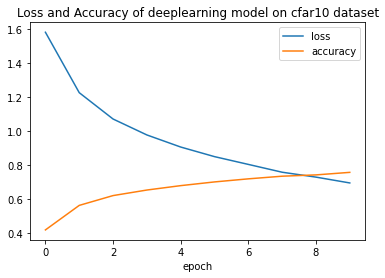

In [56]:
plt.plot(output_deep.history['loss'])
plt.plot(output_deep.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.title('Loss and Accuracy of deeplearning model on cfar10 dataset')
plt.show()

In [57]:
model_deep.evaluate(X_test_deep,Y_test_deep)

313/313 [==============================] - 1s 4ms/step - loss: 0.9155 - accuracy: 0.6862


[0.9154852628707886, 0.6862000226974487]